In [44]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("Cars-dataset.csv")

In [3]:
df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Opt_service
0,28,Male,1,0,5,14.4,5.1,0,0
1,24,Male,1,0,6,10.6,6.1,0,0
2,27,Female,1,0,9,15.5,6.1,0,0
3,25,Male,0,0,1,7.6,6.3,0,0
4,25,Female,0,0,3,9.6,6.7,0,0


In [4]:
df.shape

(418, 9)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,418.0,27.334928,4.153272,18.0,25.000,27.0,29.000,43.0
Engineer,418.0,0.748804,0.434221,0.0,0.250,1.0,1.000,1.0
MBA,418.0,0.260766,0.439578,0.0,0.000,0.0,1.000,1.0
Work Exp,418.0,5.873206,4.816110,0.0,3.000,5.0,8.000,24.0
Salary,418.0,15.418421,9.660234,6.5,9.625,13.0,14.900,57.0
Distance,418.0,11.306220,3.722143,3.2,8.600,10.9,13.575,23.4
license,418.0,0.205742,0.404727,0.0,0.000,0.0,0.000,1.0
Opt_service,418.0,0.083732,0.277317,0.0,0.000,0.0,0.000,1.0


In [6]:
df['Work Exp'].value_counts()

4     53
2     47
3     46
6     45
5     42
0     29
8     28
7     27
1     22
9     17
10    12
11     7
14     7
19     6
20     6
16     5
21     4
12     4
18     3
22     3
13     2
17     1
15     1
24     1
Name: Work Exp, dtype: int64

In [7]:
print(df.Age.value_counts())
print('-' * 25)
print(df.Engineer.value_counts())
print('-' * 25)
print(df.MBA.value_counts())
print('-' * 25)
print(df['Work Exp'].value_counts())
print('-' * 25)
print(df.Salary.value_counts())
print('-' * 25)
print(df.Distance.value_counts())
print('-' * 25)
print(df.license.value_counts())
print('-' * 25)
print(df.Opt_service.value_counts())

26    63
27    49
28    46
24    46
25    37
30    33
29    26
23    24
22    15
31    13
34     9
21     8
32     8
38     6
40     6
33     6
20     5
39     4
36     4
37     4
18     2
35     1
19     1
42     1
43     1
Name: Age, dtype: int64
-------------------------
1    313
0    105
Name: Engineer, dtype: int64
-------------------------
0    309
1    109
Name: MBA, dtype: int64
-------------------------
4     53
2     47
3     46
6     45
5     42
0     29
8     28
7     27
1     22
9     17
10    12
11     7
14     7
19     6
20     6
16     5
21     4
12     4
18     3
22     3
13     2
17     1
15     1
24     1
Name: Work Exp, dtype: int64
-------------------------
14.6    22
8.5     13
12.8    12
13.6    12
8.6     11
        ..
12.4     1
52.0     1
17.0     1
22.8     1
19.7     1
Name: Salary, Length: 116, dtype: int64
-------------------------
8.1     11
12.2    10
9.0      8
11.7     7
9.4      7
        ..
18.0     1
13.9     1
4.8      1
23.4     1
18.2     1
Name:

In [8]:
df.nunique()

Age             25
Gender           2
Engineer         2
MBA              2
Work Exp        24
Salary         116
Distance       138
license          2
Opt_service      2
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          418 non-null    int64  
 1   Gender       418 non-null    object 
 2   Engineer     418 non-null    int64  
 3   MBA          418 non-null    int64  
 4   Work Exp     418 non-null    int64  
 5   Salary       418 non-null    float64
 6   Distance     418 non-null    float64
 7   license      418 non-null    int64  
 8   Opt_service  418 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 29.5+ KB


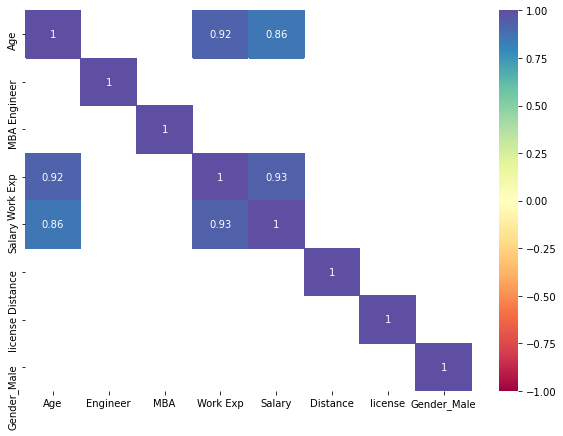

In [38]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr()[df.corr()>0.7],annot = True,vmax = 1, vmin = -1, cmap='Spectral');

In [10]:
df = pd.get_dummies(df, columns=["Gender"], drop_first=True)

In [11]:
X = df.drop("Opt_service" , axis=1)
y = df.pop("Opt_service")

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

In [13]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [14]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [15]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [19]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("")
print("---------------------------------------")
print("")
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("")
print("---------------------------------------")
print("")
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (292, 8)
Shape of test set :  (126, 8)

---------------------------------------

Percentage of classes in training set:
0    0.917808
1    0.082192
Name: Opt_service, dtype: float64

---------------------------------------

Percentage of classes in test set:
0    0.912698
1    0.087302
Name: Opt_service, dtype: float64


In [20]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9965753424657534
Accuracy on test set :  0.9365079365079365
Recall on training set :  1.0
Recall on test set :  0.8181818181818182
Precision on training set :  0.96
Precision on test set :  0.6


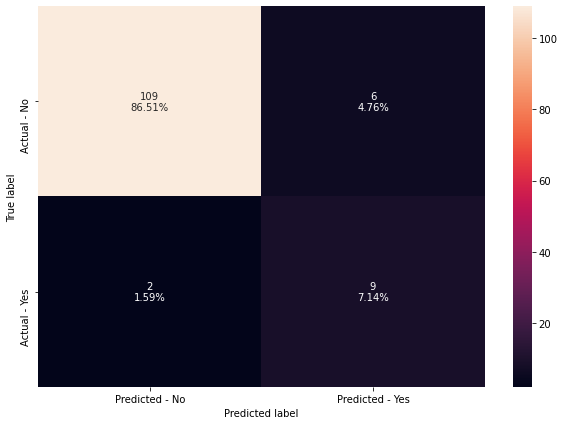

In [21]:
make_confusion_matrix(bagging_estimator,y_test)

# Random Forest

In [22]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [23]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9444444444444444
Recall on training set :  1.0
Recall on test set :  0.8181818181818182
Precision on training set :  1.0
Precision on test set :  0.6428571428571429


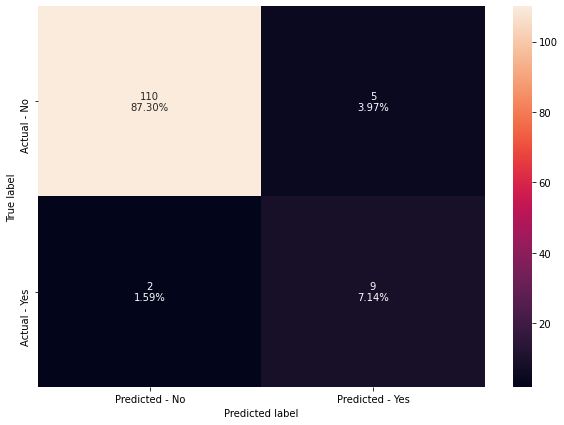

In [24]:
make_confusion_matrix(rf_estimator,y_test)

# Tuning

In [54]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=30,
                  random_state=1)

In [27]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.9444444444444444
Recall on training set :  1.0
Recall on test set :  0.8181818181818182
Precision on training set :  1.0
Precision on test set :  0.6428571428571429


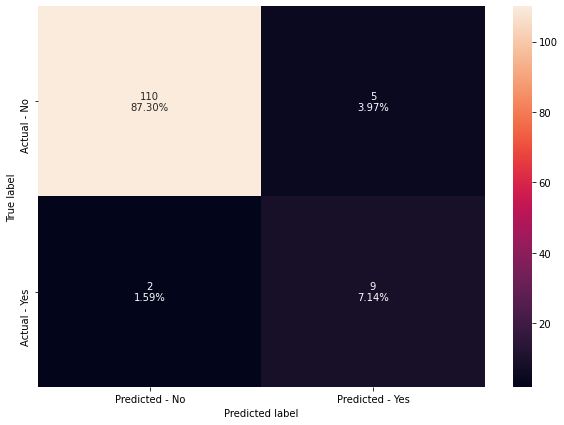

In [28]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

In [29]:
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear',random_state=1,max_iter=1000),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                    random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

In [30]:
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear',random_state=1,max_iter=1000),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                    random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

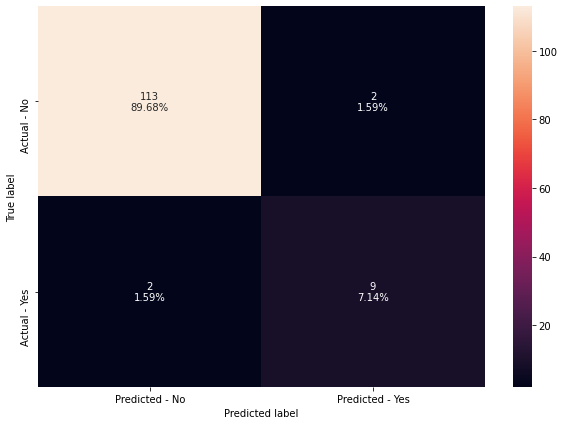

In [31]:
make_confusion_matrix(bagging_lr,y_test)

# Tuned Random Forest

In [32]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.5000000000000001, max_samples=0.4,
                       min_samples_leaf=7, n_estimators=150, random_state=1)

In [33]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.9931506849315068
Accuracy on test set :  0.9444444444444444
Recall on training set :  0.9583333333333334
Recall on test set :  0.8181818181818182
Precision on training set :  0.9583333333333334
Precision on test set :  0.6428571428571429


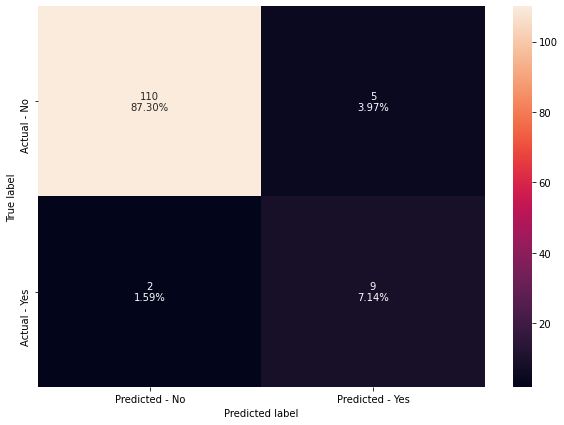

In [34]:
make_confusion_matrix(rf_estimator_tuned,y_test)

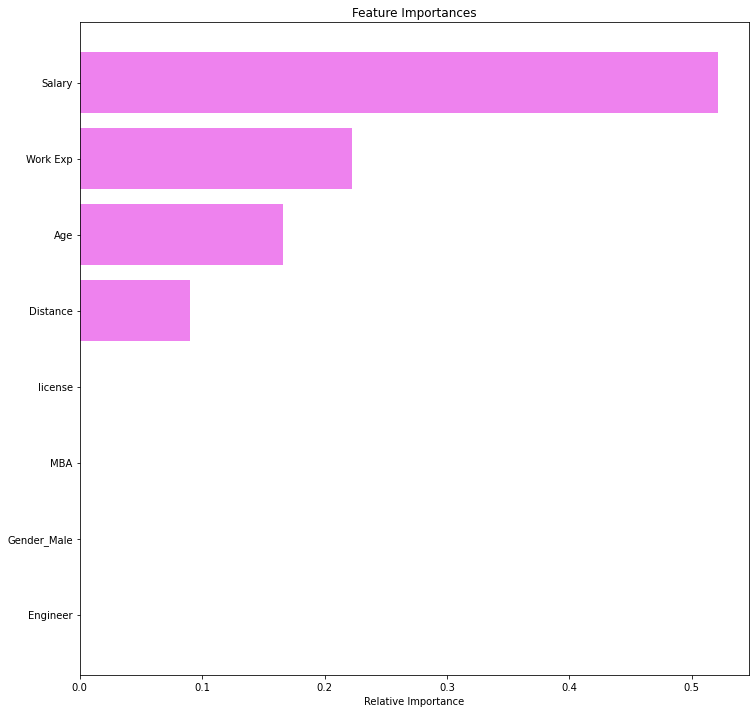

In [36]:
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()